In [1]:
from __future__ import print_function

import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24


In [2]:
!pip install  histomicstk --user

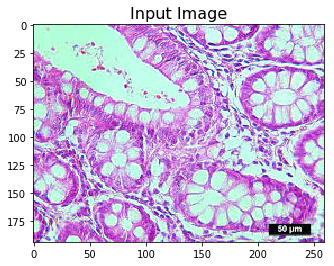

In [3]:
inputImageFile = ('/home/gutmanlab/Downloads/papers/colon.jpeg')  # H&E.png

imInput = skimage.io.imread(inputImageFile)[:, :, :3]

plt.imshow(imInput)
_ = plt.title('Input Image', fontsize=16)

In [4]:
imInput.shape

(194, 259, 3)

In [5]:
x, y, z = imInput.shape

image_2d = imInput.reshape(x*y, z)

image_2d.shape

(50246, 3)

In [6]:
image_2d

Array([[180, 255, 216],
       [180, 255, 216],
       [180, 255, 216],
       ...,
       [114,  15, 158],
       [161,  39, 122],
       [ 89,  71, 170]], dtype=uint8)

In [7]:
from sklearn import cluster

In [8]:
kmeans_cluster = cluster.KMeans(n_clusters=3)

kmeans_cluster.fit(image_2d)

cluster_centers = kmeans_cluster.cluster_centers_

cluster_labels = kmeans_cluster.labels_

In [9]:
cluster_centers 

array([[205.27367862, 236.94804398, 231.31112292],
       [199.13355415, 143.15305293, 217.46028373],
       [144.10171744,  76.77663055, 181.58321407]])

In [10]:
cluster_labels 

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [11]:
cluster_labels.shape

(50246,)

In [12]:
cluster_labels4d=tuple(zip(*zip(*image_2d),cluster_labels))

In [13]:
len(cluster_labels4d)

50246

In [ ]:
np.savetxt('/home/gutmanlab/Downloads/papers/kmeans_data.csv', cluster_labels4d, delimiter=',')

In [ ]:
import cv2

In [ ]:
np.savetxt('/home/gutmanlab/Downloads/papers/df1.csv', image_2d, delimiter=',')

In [ ]:
np.savetxt('/home/gutmanlab/Downloads/papers/df1_cluster_labels.csv', cluster_labels, delimiter=',')

In [15]:
import pandas as pd

In [50]:
df = pd.read_csv('/home/gutmanlab/Downloads/papers/kmeans_data150.csv',names=['RED','GREEN','BLUE','CLUSTER_NO'])


In [51]:
from sklearn.preprocessing import StandardScaler
features = ['RED','GREEN','BLUE']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['CLUSTER_NO']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [52]:
x

array([[-4.75983043e-01,  8.73025474e-01,  1.25411912e-02],
       [-4.75983043e-01,  8.73025474e-01,  1.25411912e-02],
       [-4.75983043e-01,  8.73025474e-01,  1.25411912e-02],
       [-4.75983043e-01,  8.73025474e-01,  1.25411912e-02],
       [-4.75983043e-01,  8.73025474e-01,  1.25411912e-02],
       [-4.75983043e-01,  8.73025474e-01,  1.25411912e-02],
       [-4.75983043e-01,  8.73025474e-01,  1.25411912e-02],
       [-4.75983043e-01,  8.73025474e-01,  1.25411912e-02],
       [-3.05827046e-01,  8.58166309e-01, -3.00988589e-01],
       [-5.78076641e-01,  8.58166309e-01, -4.05498516e-01],
       [-6.12107841e-01,  8.73025474e-01, -3.00988589e-01],
       [-3.73889445e-01,  8.73025474e-01, -1.96478662e-01],
       [-3.73889445e-01,  8.73025474e-01, -4.57753479e-01],
       [-7.48232639e-01,  7.39292989e-01, -1.08481304e+00],
       [-1.02048223e+00,  8.28447979e-01, -1.13706800e+00],
       [-1.05451343e+00,  8.73025474e-01, -7.19028296e-01],
       [-5.44045442e-01,  8.58166309e-01

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [56]:
principalDf

,principal component 1,principal component 2
0,-0.159583,-0.963706
1,-0.159583,-0.963706
2,-0.159583,-0.963706
3,-0.159583,-0.963706
4,-0.159583,-0.963706
5,-0.159583,-0.963706
6,-0.159583,-0.963706
7,-0.159583,-0.963706
8,-0.003005,-0.831539
9,0.210057,-1.014920


In [54]:
finalDf = pd.concat([principalDf, df[['CLUSTER_NO']]], axis = 1)

/home/gutmanlab/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



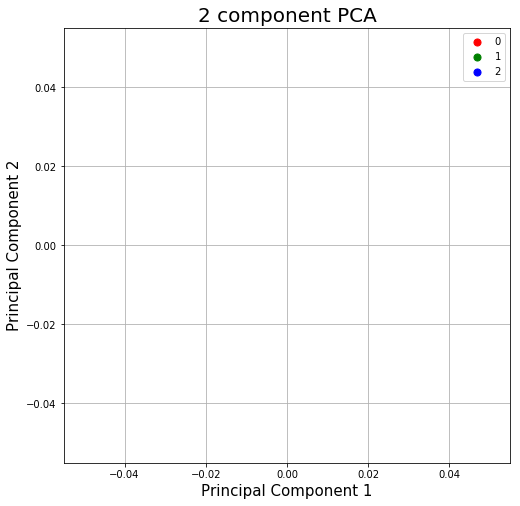

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0','1','2']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CLUSTER_NO'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
pca.explained_variance_ratio_

In [22]:
df1 = pd.read_csv(
    filepath_or_buffer='/home/gutmanlab/Downloads/papers/kmeans_data150.csv', 
    header=None, 
    sep=',')

df1.columns=['RED', 'GREEN', 'BLUE', 'CLUSTER_NO']
df1.dropna(how="all", inplace=True) # drops the empty line at file-end

df1.tail()

,RED,GREEN,BLUE,CLUSTER_NO
145,179,163,208,1
146,208,140,223,1
147,226,141,232,1
148,233,204,255,0
149,187,177,211,1


In [23]:
X1 = df1.iloc[:,0:3].values
y1 = df1.iloc[:,3].values

In [25]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py

ModuleNotFoundError: No module named 'plotly'

In [27]:
pip install plotly --user

     |████████████████████████████████| 41.5MB 9.5MB/s eta 0:00:01
  Stored in directory: /home/gutmanlab/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X1)


In [33]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.12253463  0.37611049]
 [-0.12253463  1.00671141  0.3521706 ]
 [ 0.37611049  0.3521706   1.00671141]]


In [34]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.12253463  0.37611049]
 [-0.12253463  1.00671141  0.3521706 ]
 [ 0.37611049  0.3521706   1.00671141]]


In [35]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.53986511  0.68033476  0.49567155]
 [ 0.51723703 -0.73269024  0.44230179]
 [-0.66408698 -0.01759638  0.74744822]]

Eigenvalues 
[0.42665997 1.12894791 1.46452634]


In [39]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 0.53986511  0.68033476  0.49567155]
 [ 0.51723703 -0.73269024  0.44230179]
 [-0.66408698 -0.01759638  0.74744822]]

Eigenvalues 
[0.42381557 1.12142159 1.45476283]


In [38]:
cor_mat2 = np.corrcoef(X1.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.53986511  0.68033476  0.49567155]
 [ 0.51723703 -0.73269024  0.44230179]
 [-0.66408698 -0.01759638  0.74744822]]

Eigenvalues 
[0.42381557 1.12142159 1.45476283]


In [40]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.49567155,  0.68033476, -0.53986511],
       [-0.44230179, -0.73269024, -0.51723703],
       [-0.74744822, -0.01759638,  0.66408698]])

In [41]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')


Everything ok!


In [42]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.4547628327748308
1.1214215949696131
0.42381557225555677


In [44]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), 
                      eig_pairs[1][1].reshape(3,1)))

print('Matrix W:\n', matrix_w)


Matrix W:
 [[ 0.49567155  0.68033476]
 [ 0.44230179 -0.73269024]
 [ 0.74744822 -0.01759638]]


In [45]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [48]:
sklearn_pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
Y_sklearn

array([[-1.59583367e-01, -9.63705730e-01],
       [-1.59583367e-01, -9.63705730e-01],
       [-1.59583367e-01, -9.63705730e-01],
       [-1.59583367e-01, -9.63705730e-01],
       [-1.59583367e-01, -9.63705730e-01],
       [-1.59583367e-01, -9.63705730e-01],
       [-1.59583367e-01, -9.63705730e-01],
       [-1.59583367e-01, -9.63705730e-01],
       [-3.00534123e-03, -8.31538537e-01],
       [ 2.10056796e-01, -1.01492040e+00],
       [ 1.42237099e-01, -1.05079917e+00],
       [-5.39567410e-02, -8.90569914e-01],
       [ 1.41332657e-01, -8.85972423e-01],
       [ 8.54728598e-01, -1.03163265e+00],
       [ 9.89299445e-01, -1.28125700e+00],
       [ 6.73988000e-01, -1.34442709e+00],
       [-8.02166579e-02, -9.98204282e-01],
       [-8.02166579e-02, -9.98204282e-01],
       [-8.02166579e-02, -9.98204282e-01],
       [-8.02166579e-02, -9.98204282e-01],
       [-8.02166579e-02, -9.98204282e-01],
       [-8.02166579e-02, -9.98204282e-01],
       [-8.02166579e-02, -9.98204282e-01],
       [-8.

In [49]:
data = []

for name, col in zip(('0', '1', '2'), colors.values()):

    trace = dict(
        type='scatter',
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
        xaxis=dict(title='PC1', showline=False),
        yaxis=dict(title='PC2', showline=False)
)
fig = dict(data=data, layout=layout)
np.plot(fig, filename='pca-scikitlearn')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



AttributeError: module 'numpy' has no attribute 'plot'